In [2]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.contrib import rnn
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import time
%matplotlib inline

import os
print(os.listdir("../input"))

['train.csv', 'test.csv']


In [3]:
#首先读取train文件，并保存为df_train数据框，进行描述性统计
df_train = pd.read_csv("../input/train.csv")
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
#然后读取train文件，并保存为df_test数据框，并进行描述性统计
df_test = pd.read_csv("../input/test.csv")
df_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
#制作训练集，验证集和测试集
#首先将数据按行随机打乱，然后进行切分，效果和train_test_split函数一样
#注意要先进行打乱，再将X，Y分开，保证数据和标签一一对应
df_train = shuffle(df_train,random_state = 42)                             
#用values可以讲数据框转换成不含有列名只含有内容的多维数组
trainXYorig = df_train.values
#获取数据的行数
m = trainXYorig.shape[0]
#确定切分点，这里取行数的80%
partition = int(m * 0.8)
#将除开第一列标签的部分选取为列名，并且reshape成为四维数组，第一个维度是-1，代表的是样本数可以是任意张图片
trainXorig = trainXYorig[:, 1:].reshape(-1, 28, 28, 1)   #注意reshape是函数，因此接的是小括号
#归一化
trainX = trainXorig / 255   
#制作X的训练集和验证集，注意要先定义devX，否则trainX名字会更新，导致devX无法正常获取数据
devX = trainX[partition: , :, :, :]
trainX = trainX[0: partition, :, :, :]

#取大矩阵的第一列为原始标签Y
trainYorig = trainXYorig[:, 0]
#注意！！！将Y的标签从数字类别转化成独热向量，方便后面计算交叉熵，取10阶单位矩阵的第标签行作为新标签矩阵中对应的一行
trainY = np.eye(10)[trainYorig, :] 
#制作Y的训练集和验证集，同样的切分
devY = trainY[partition: , :]
trainY = trainY[0: partition, :]

#测试集也要进行reshape
testXorig = df_test.values.reshape(-1, 28, 28, 1)
#归一化
testX = testXorig / 255

#输出各个数据集合的维数，查验是否出错
print("训练集X的形状是{} ".format(trainX.shape))
print("训练集Y的形状是{} ".format(trainY.shape))
print("验证集X的形状是{} ".format(devX.shape))
print("验证集Y的形状是{} ".format(devY.shape))
print("测试集X的形状是{} ".format(testX.shape))

训练集X的形状是(33600, 28, 28, 1) 
训练集Y的形状是(33600, 10) 
验证集X的形状是(8400, 28, 28, 1) 
验证集Y的形状是(8400, 10) 
测试集X的形状是(28000, 28, 28, 1) 


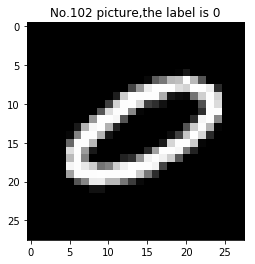

In [6]:
#画出一张图片，先选我们要花的第index张图片
index = 102
#调用imshow的API，画出第index个样本的所有行，所有列，和第一个channel，cmap参数定义的是图片颜色，3channel图片无法定义cmap， interpolation可以定义缺失值插值方法（此处未用到）
plt.imshow(trainX[index, :, :, 0], cmap ='gray')
#给图片一个标题
plt.title("No.{} picture,the label is {}".format(index,trainYorig[index])) #标题中如果有中文无法正常显示？
plt.show()

In [7]:
#设置一个随机小批量梯度下降用的生成mini_batch的函数
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    #先获得输入数据的总行数
    m = X.shape[0]                  
    #定义一个空的mini-batch的list，用来放所有的mini_batch
    mini_batches = []
    #设置随机数种子
    np.random.seed(seed)
    
    #permutation和shuffle类似，都是随机打乱，区别是permutation是返回一个被打乱的序列，原序列不变，shuffle直接改变原序列
    #如果permutation的变量用的是一个integer，那么会直接打乱np.arange(m),如下所示，会得到一个乱序的值为0~m-1的list
    permutation = list(np.random.permutation(m))
    #得到一个打乱的X和Y，维数索引是前面的被打乱的m
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]
    
    #计算mini_batch的个数，mini_batch_size是函数里面给出的，int函数取整是取整数部分舍弃小数部分
    num_complete_minibatches = int(m / mini_batch_size) 
    #对整个被打乱的X切片处理，并循环操作，得到一个很多mini_batch
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size: (k + 1) * mini_batch_size, :, :, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size: (k + 1) * mini_batch_size, :]
        #每一个小batch都由打乱的X，Y拼成
        mini_batch = (mini_batch_X, mini_batch_Y)
        #组合所有的小batch
        mini_batches.append(mini_batch)
    
    #如果总的样本数不能被mini_batch的个数整除，将剩余的样本也补充进来
    if (m % mini_batch_size != 0):
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size: m, :, :, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size: m, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    #最后返回的是mini_batches的组合
    return mini_batches

CNN

In [8]:
# 定义X，Y两个占位符
X = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28, 1], name = "X")
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10], name = "Y")
#定义一个布尔型变量的占位符，用来确定是不是在计算图需要训练的部分。
#一张计算图里面根据你要fetch的值的不同，有些部分是不参与训练的。batch_norm层里面需要用到这个参数。对输出的均值和方差有影响。
is_training = tf.placeholder(tf.bool)    
#打印出来，确认X，Y的类型和维度是否正确
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X:0", shape=(?, 28, 28, 1), dtype=float32)
Y = Tensor("Y:0", shape=(?, 10), dtype=float32)


In [9]:
# 定义W1，W2，W3三个参数，也就是卷积核；get_variable 和 variable 类似，有则调用，无则新建
# leNet-5 只有两层卷积层，这里定义了三层，扩大了网络规模
# 初始化方法采用的是泽维尔初始化，这种方法的好处是可以使得每层输出的方差大致相等，使得信息能够在网络中更好的流动，具体方法是在某个均匀分布中实现初始化
#卷积核的前两个维度是单层卷积核的维度，也就是它的长和宽，第三个维度是上一层的channel的个数，第三个维度是卷积核总共的层数
W1 = tf.get_variable("W1", shape=[3, 3, 1, 4], initializer=tf.contrib.layers.xavier_initializer())  #每个卷积核都要定义名字，形状和初始化方法
W2 = tf.get_variable("W2", shape=[3, 3, 4, 8], initializer=tf.contrib.layers.xavier_initializer())
W3 = tf.get_variable("W3", shape=[3, 3, 8, 8], initializer=tf.contrib.layers.xavier_initializer()) 

In [12]:
# 定义第一层网络结构，架构是:卷积运算 CONV2D(Z1) -> 批标准化 BatchNorm(N1) -> 激活函数 RELU(A1) -> 最大池化层 MAXPOOL(P1) -> 
Z1 = tf.nn.conv2d(input=X, filter=W1, strides=[1, 1, 1, 1], padding='SAME')    #conv2d 在tf.nn模块，需要定义输入，卷积核，步长和padding。padding分为same padding和valid padding 两种
N1 = tf.layers.batch_normalization(Z1, training=is_training)      #批标准化在tf.layers模块！！！批标准化可以加速网络的计算
A1 = tf.nn.relu(N1)   #对上一层的结果取激活函数为relu：max{x，0}
#至此，卷积部分定义完毕，接下来是池化
P1 = tf.nn.max_pool(value=A1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")  #池化层也需要padding；池化层的尺寸和步长设置貌似和卷积核不一样？

# 定义第二层网络结构，架构是:卷积运算 CONV2D(Z2) -> 批标准化 BatchNorm(N2) -> 激活函数 RELU(A2) -> 最大池化层 MAXPOOL(P1) ->  
Z2 = tf.nn.conv2d(input=P1, filter=W2, strides=[1, 1, 1, 1], padding='SAME')
N2 = tf.layers.batch_normalization(Z2, training=is_training)
A2 = tf.nn.relu(N2)
P2 = tf.nn.max_pool(value=A2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 定义第三层网络结构，架构是:卷积运算 CONV2D(Z3) -> 批标准化 BatchNorm(N3) -> 激活函数 RELU(A3) -> 最大池化层 MAXPOOL(P1) -> 
Z3 = tf.nn.conv2d(input=P2, filter=W3, strides=[1, 1, 1, 1], padding='SAME')
N3 = tf.layers.batch_normalization(Z3, training=is_training)
A3 = tf.nn.relu(N3)
P3 = tf.nn.max_pool(value=A3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 定义第四层网络结构，架构是:扁平化层 FLATTEN(F3) -> 全连接层 FULLYCONNECTED(Z4) -> 批标准化 BatchNorm(N4) -> 激活函数 RELU(A4)
F3 = tf.contrib.layers.flatten(P3)    #contrib模块包含的是有试验性质的新方法
Z4 = tf.contrib.layers.fully_connected(F3, num_outputs=64, activation_fn=None)    #总共要接两层全连接层，这是第一层，包含64个神经元，没有激活函数
N4 = tf.layers.batch_normalization(Z4, training=is_training)    #批标准化
A4 = tf.nn.relu(N4)

# 定义第五层网络结构，仅含有一个全连接层做softmax层，64 to 10
Z5 = tf.contrib.layers.fully_connected(A4, num_outputs=10, activation_fn=None)

# 代价函数，reducemean就是对某一个维度求平均，可以搭配axis使用，没有axis的话，就是对所有维度求平均。
# 注意！！！以后不用with logits了，要用with logits v2
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z5, labels=Y))

In [13]:
# 定义超参数
learning_rate = 0.002
num_epochs = 50
mini_batch_size = 64
# 初始化costs，为一个空列表
costs = []

In [14]:
# 定义优化器
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# 变量初始化
init = tf.global_variables_initializer()                                      

In [15]:
# 开启新会话，并且初始化
sess = tf.Session()
sess.run(init)

In [16]:
# 通过collection存储
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

No. 0 epoch, cost = 0.304607
No. 2 epoch, cost = 0.074841
No. 4 epoch, cost = 0.051612
No. 6 epoch, cost = 0.040223
No. 8 epoch, cost = 0.033056
No. 10 epoch, cost = 0.029123
No. 12 epoch, cost = 0.024198
No. 14 epoch, cost = 0.020645
No. 16 epoch, cost = 0.018072
No. 18 epoch, cost = 0.016474
No. 20 epoch, cost = 0.014202
No. 22 epoch, cost = 0.013142
No. 24 epoch, cost = 0.012574
No. 26 epoch, cost = 0.011786
No. 28 epoch, cost = 0.010974
No. 30 epoch, cost = 0.010748
No. 32 epoch, cost = 0.008687
No. 34 epoch, cost = 0.008640
No. 36 epoch, cost = 0.009932
No. 38 epoch, cost = 0.008654
No. 40 epoch, cost = 0.006929
No. 42 epoch, cost = 0.008309
No. 44 epoch, cost = 0.005757
No. 46 epoch, cost = 0.006031
No. 48 epoch, cost = 0.008330


Text(0.5,1,'cost')

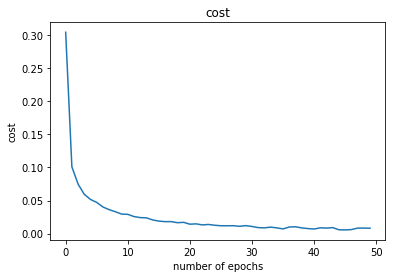

In [17]:
# 第一层循环，从大周期epoch开始
for epoch in range(num_epochs):
    # random_mini_batches函数，返回的是由很多mini_batch组成的mini_batches的列表
    minibatches = random_mini_batches(trainX, trainY, mini_batch_size=mini_batch_size, seed=epoch + int(time.time()))
    # 初始化epochcost
    epoch_cost = 0.
    
    # 第二层循环，在minibatches列表内部循环
    for minibatch in minibatches:
        # ？？？
        (minibatchX, minibatchY) = minibatch
        # 不需要返回的值，可以赋值给空格；sess.run的参数，第一项是要fetch的值，第二项是feed_dict；计算上面定义的cost
        _, mini_batch_cost, __ = sess.run([optimizer, cost, extra_update_ops], feed_dict={X: minibatchX, Y: minibatchY, is_training:True})
        # 每一个epoch的cost等于所有mini_batch的cost相加
        epoch_cost += mini_batch_cost

    # 对epoch_cost 求平均
    epoch_cost /= len(minibatches)
    # 在costs列表 加上上一个epoch的cost
    costs.append(epoch_cost)
    # 如果 epoch是偶数（只输出一半的值）
    if epoch % 2 == 0:
        # 格式化输出，%d是数字，%f是浮点数
        print("No. %d epoch, cost = %f" % (epoch, epoch_cost))

# 用plt画随着epoch变化costs的曲线
plt.plot(costs)
plt.xlabel("number of epochs")
plt.ylabel("cost")
plt.title("cost")

Evaluation

In [18]:
# predict_op返回的是向量沿轴线方向的最大值的索引
predict_op = tf.argmax(Z5, 1)
# tf.equal 返回的是一个全是bool值变量的数组，相同返回True，不同返回False
correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
# 将布尔型变化成浮点型，True为1，False为0.然后求平均，可以得到平均正确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [19]:
# eval()也是启动计算的一种方式。基于Tensorflow的基本原理，首先需要定义图，然后计算图，其中计算图的函数常见的有run()函数，如sess.run()。同样eval()也是此类函数，是sess.run()的另外一种写法。
# 计算训练集误差
# ？？？is_training标记为False的时候不会执行dropout等操作。注意is_training是放在feed_dict里面的
train_accuracy = accuracy.eval(session=sess, feed_dict={X: trainX, Y: trainY, is_training:False})    
# 计算验证集误差
dev_accuracy = accuracy.eval(session=sess, feed_dict={X: devX, Y: devY, is_training:False})
# 输出
print("train_accuracy = " + str(train_accuracy))
print("dev_accuracy = " + str(dev_accuracy))

train_accuracy = 0.9993155
dev_accuracy = 0.9842857


In [ ]:
# 计算测试集预测值
testY_pred = predict_op.eval(session=sess, feed_dict={X: testX, is_training:False})
# 保存成一个一列dataframe，列标签是Label
testYDf = pd.DataFrame(testY_pred.reshape(-1, 1), index=np.arange(1, 1 + len(testY_pred)), columns=["Label"]) # index 要求从 1 开始
testYDf.to_csv("test_predict.csv", index=True, index_label="ImageId")